# MLP CLASSIFIER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv("D:/TEL U/S2 TELU/SEM 2 TELU\MATLANJUT/CODE1/data/td.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df= df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [6]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [7]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
for col in df.select_dtypes(include='int64').columns:
    df[col] = df[col].astype('float64')
    
print(df.dtypes)
print(df.head())

Survived    float64
Pclass      float64
Sex           int32
Age         float64
SibSp       float64
Parch       float64
Ticket        int32
Fare        float64
Embarked      int32
dtype: object
   Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  Embarked
0       0.0     3.0    1  22.0    1.0    0.0     523   7.2500         2
1       1.0     1.0    0  38.0    1.0    0.0     596  71.2833         0
2       1.0     3.0    0  26.0    0.0    0.0     669   7.9250         2
3       1.0     1.0    0  35.0    1.0    0.0      49  53.1000         2
4       0.0     3.0    1  35.0    0.0    0.0     472   8.0500         2


In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
# df['Cabin'].fillna('None', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22384\1594689418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22384\1594689418.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
X= df.drop('Survived', axis=1)
y=df['Survived']

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.163517
Ticket     -0.164549
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


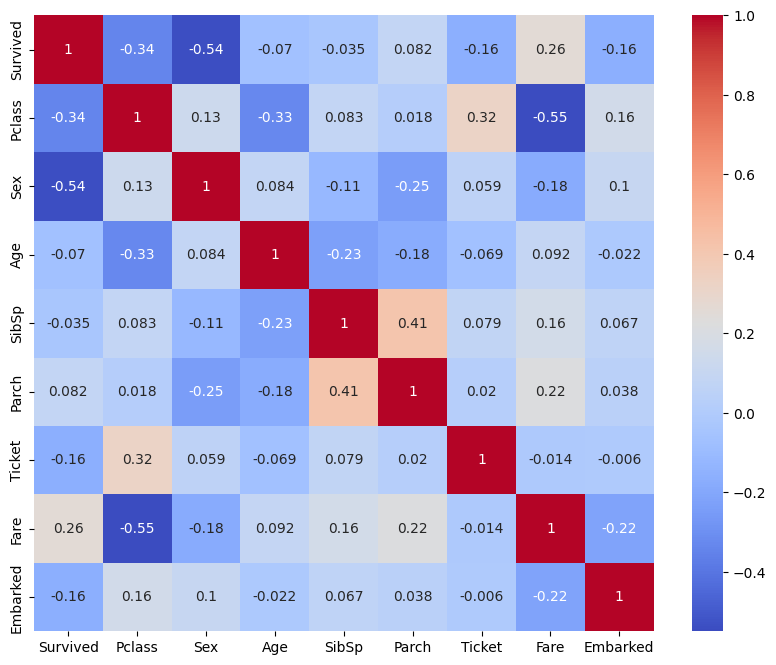

In [11]:
corr = df.corr()
print(corr['Survived'].sort_values(ascending=False))

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# X_encoded = X.copy()
# y_encoded = y.copy()

In [ ]:
# le = LabelEncoder()
# for col in X_encoded.select_dtypes(include='object').columns:
#     X_encoded[col] = le.fit_transform(X_encoded[col])
# for col in X_encoded.select_dtypes(include='int64').columns:
#     X_encoded[col] = X_encoded[col].astype('float64')

# y_encoded = y.astype('float64')
# print(X_encoded.dtypes)
# print(y_encoded.dtype)
# print(X_encoded.head())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
mlp = MLPClassifier(max_iter=1000, random_state=42)

In [14]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64]
}


In [15]:
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [16, 32, 64],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [16]:
print("Best Parameters dari Grid Search:")
print(grid_search.best_params_)

Best Parameters dari Grid Search:
{'activation': 'tanh', 'batch_size': 32, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}


In [17]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       105
         1.0       0.69      0.76      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.76      0.76      0.76       179

Accuracy: 0.7597765363128491
